In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, shutil, re
from collections import Counter
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
from sklearn import manifold
from nltk.corpus.reader import PlaintextCorpusReader
from adjustText import adjust_text 
from sklearn.feature_extraction.text import TfidfTransformer
import scipy as sp

In [3]:
bpath = '/Users/erickpeirson/Jana/text Corpus 1'
target = '/Users/erickpeirson/Jana/text1_clean'

In [4]:
technocratic = [
    'stakeholder',
    'decision maker',
    'implement',
    'input',
    'output',
    'effecti[a-z]*',
    'scrutiniz[a-z]*',
    'verif[a-z]*',
    'test[a-z]*',
    'expert[a-z]*',
    'policy',
    'state',
    'reform',
    'govern[a-z]*',
    'solution',
    'solv[a-z]*',
    'supervis[a-z]*',
    'regulat[a-z]*',
]

In [5]:
deliberative = [
    'partn[a-z]*',
    'collaborat[a-z]*',
    'subj[a-z]*',
    'revol[a-z]*',
    'co-design',
    'engag[a-z]*',
    'empow[a-z]*',
    'interpret[a-z]*',
    'learn[a-z]*',
    'explor[a-z]*',
    'tacit knowl[a-z]*',
    'socially robust',
    'reflect[a-z]*',
    'disput[a-z]*',
    'civil soc[a-z]*',
    'lifeworld',
    'joint understanding',
    'mutual[a-z]*',
    'dillemm[a-z]*',
    'coordinat[a-z]*',
    'align[a-z]*',
    'arrang[a-z]*',
]

In [6]:
vocabulary = technocratic + deliberative

In [7]:
for fname in os.listdir(bpath):
    fpath = os.path.join(bpath, fname)
    tpath = os.path.join(target, unidecode(fname.decode('utf-8')))
    shutil.copy(fpath, tpath)

In [132]:
filenames = os.listdir(target)[1:]

In [133]:
technocratic_data = []#np.ndarray((len(filenames),    # Each document.
                                #len(technocratic)))   # Each word (in techocratic).
deliberative_data = []#np.ndarray((len(filenames), len(deliberative)))

In [134]:
document_size = []
document_labels = []

In [135]:
term_counts = []#np.ndarray((len(filenames), len(vocabulary)))

In [136]:
CHUNK_SIZE = 5000    # Words.
i = 0
for _, fname in enumerate(filenames):
    fpath = os.path.join(target, fname)
    with open(fpath, 'r') as f:
        raw = f.read().lower().decode('utf-8').split()
    SIZE = len(raw)
    page = 0
    for start in xrange(0, SIZE, CHUNK_SIZE):
        end = start + CHUNK_SIZE
        raw_chunk = raw[start:end]
        document_size.append(len(raw_chunk))
        document_labels.append('%s__%i' % (fname, page))

        raw_chunk_merge = u' '.join(raw_chunk)
        for j, term in enumerate(technocratic):
            v = len(re.findall(term, raw_chunk_merge, flags=re.U))
            technocratic_data.append((v, (i, j)))
        for j, term in enumerate(deliberative):
            v = len(re.findall(term, raw_chunk_merge, flags=re.U))
            deliberative_data.append((v, (i, j)))
        for j, term in enumerate(vocabulary):
            v = len(re.findall(term, raw_chunk_merge, flags=re.U))
            term_counts.append((v, (i, j)))
        
        page += 1
        i += 1
    print '\r', fname, i,
    

Zurayk-2011-Ensuring that potential Gulf farml.txt 3026


In [137]:
def to_dense(data):
    V, IJ = zip(*data)
    I, J = zip(*IJ)
    return sp.sparse.coo_matrix((V, (I, J))).todense()

In [138]:
technocratic_data_matrix = to_dense(technocratic_data)
deliberative_data_matrix = to_dense(deliberative_data)
term_counts_matrix = to_dense(term_counts)

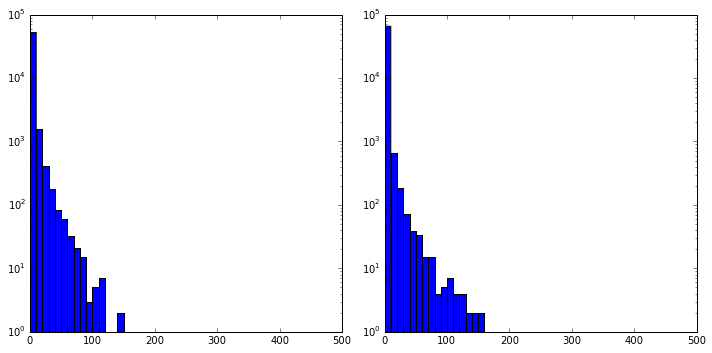

In [139]:
plt.figure(figsize(10, 5))
plt.subplot(121)
plt.hist(technocratic_data_matrix.flat, log=True, bins=np.arange(0, 500, 10))
plt.subplot(122)
plt.hist(deliberative_data_matrix.flat, log=True, bins=np.arange(0, 500, 10))
plt.tight_layout()
plt.show()

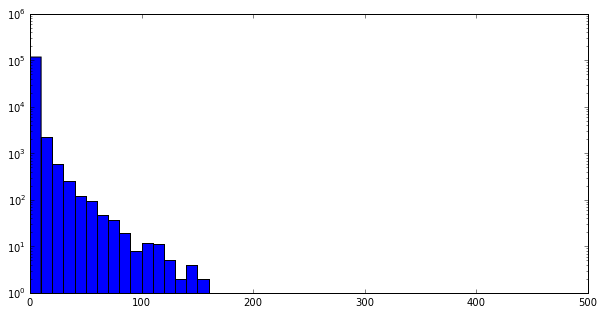

In [140]:
plt.hist(term_counts_matrix.flat, log=True, bins=np.arange(0, 500, 10))
plt.show()

In [141]:
term_counts_masked = np.ma.MaskedArray(term_counts_matrix, not np.isnan)

In [142]:
term_counts_masked.shape

(3026, 40)

In [143]:
term_frequency = (term_counts_masked/term_counts_masked.sum(axis=1))

In [144]:
term_frequency.shape

(3026, 40)

In [145]:
mds = manifold.SpectralEmbedding(n_components=2, random_state=6)
results = mds.fit(term_frequency)

In [146]:
coords = results.embedding_

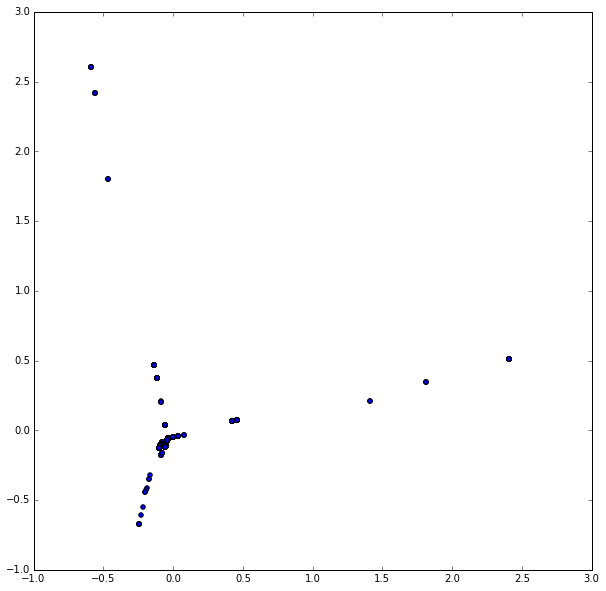

In [147]:
plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1])#, marker = 'o', c=[c(_d) for _d in list(np.sort(_D))])
plt.show()

In [176]:
_D = np.array(_D).reshape(_D.shape[0])**2.
_T = np.array(_T).reshape(_T.shape[0])**2.

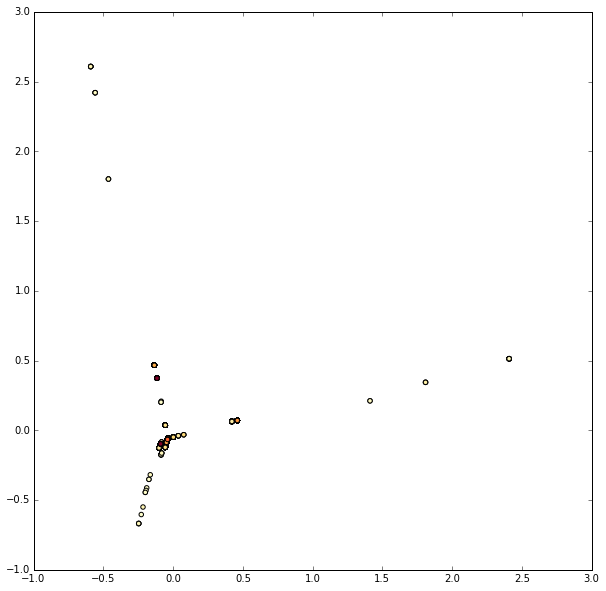

In [177]:
plt.figure(figsize=(10, 10))
plt.scatter(coords[_D.argsort()[::-1]][:, 0], coords[_D.argsort()[::-1]][:, 1], marker = 'o', c=[c(_d) for _d in list(np.sort(_D))])
plt.show()

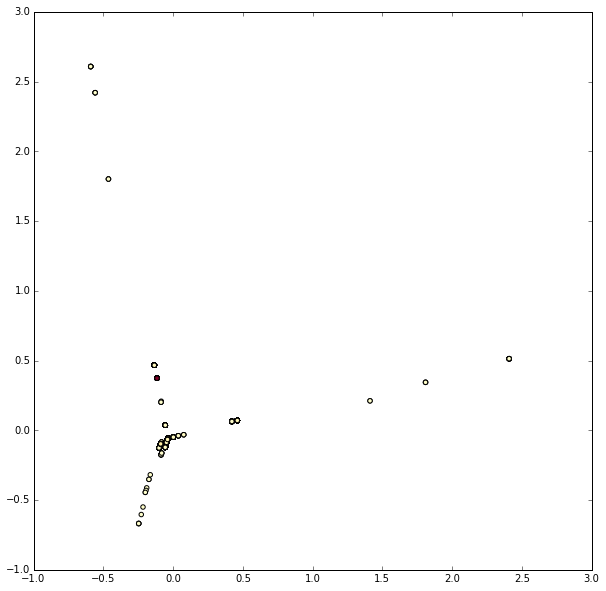

In [178]:
plt.figure(figsize=(10, 10))
plt.scatter(coords[_T.argsort()[::-1]][:, 0], coords[_T.argsort()[::-1]][:, 1], marker = 'o', c=[c(_d) for _d in list(np.sort(_T))])
plt.show()

In [150]:
mds = manifold.SpectralEmbedding(n_components=2, random_state=6)
results = mds.fit(term_frequency.T)
_coords = results.embedding_

In [151]:
colors = ['r' if t in technocratic else 'b' for t in vocabulary]

In [152]:
term_frequency.shape

(3026, 40)

In [153]:
sizes = [term_frequency[:, i].sum()*5. for i, t in enumerate(vocabulary)]

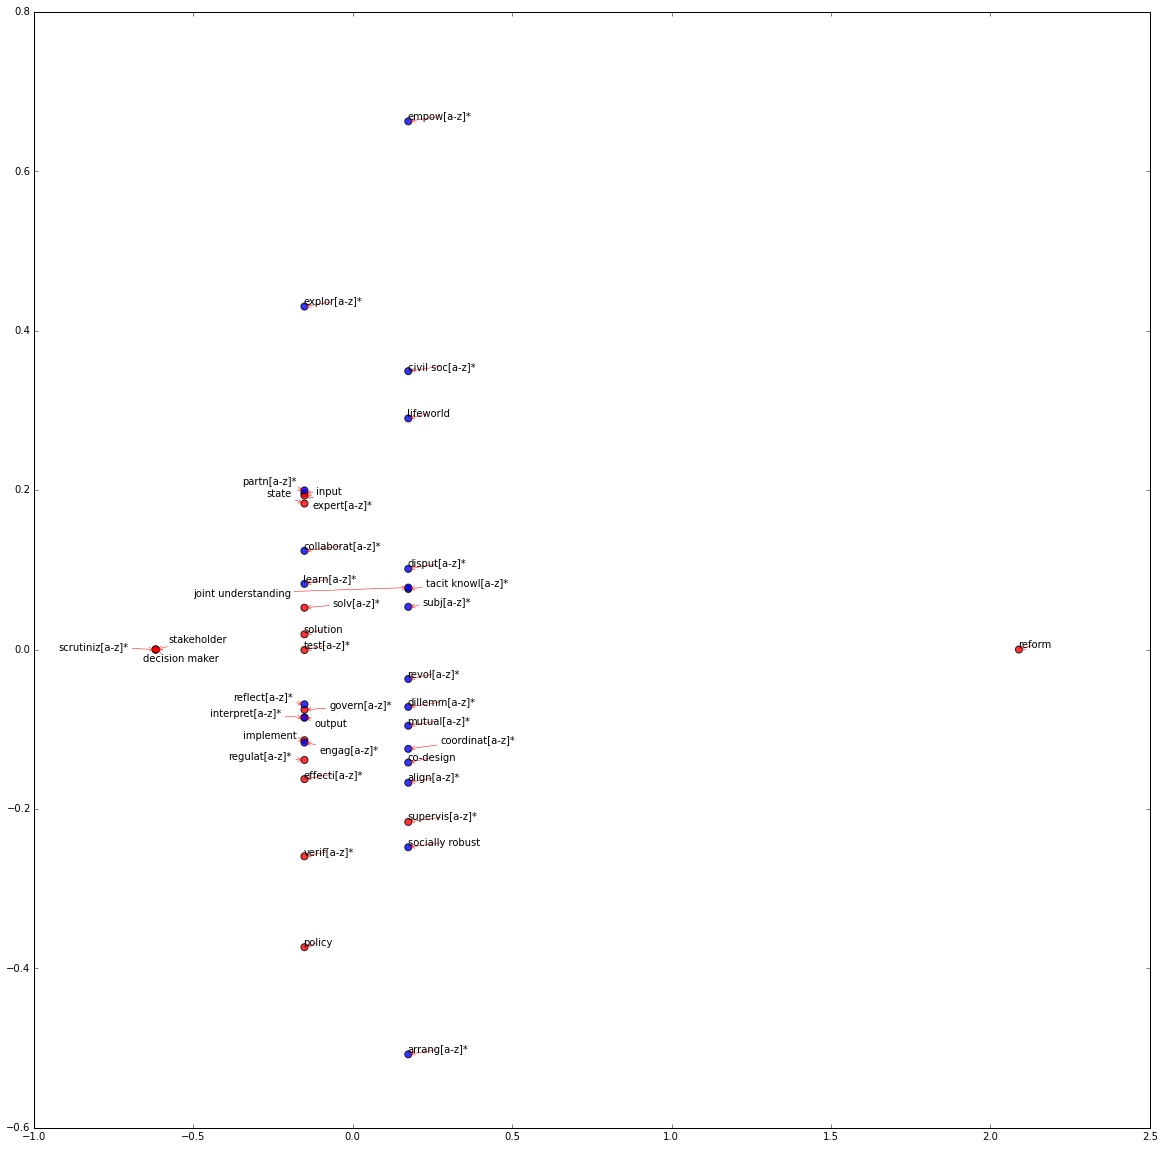

In [155]:
plt.figure(figsize=(20, 20))


plt.scatter(_coords[:, 0], _coords[:, 1], marker = 'o', c=colors, s=50, alpha=0.8)
t = []
for i, term in enumerate(vocabulary):
    t.append(plt.text(_coords[i, 0], _coords[i, 1], term))
adjust_text(t, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), force_points=0.5, expand_points=(0.9, 0.9))
plt.show()

In [156]:
mds = manifold.Isomap(n_components=2)
results = mds.fit(term_frequency.T)
_coords = results.embedding_

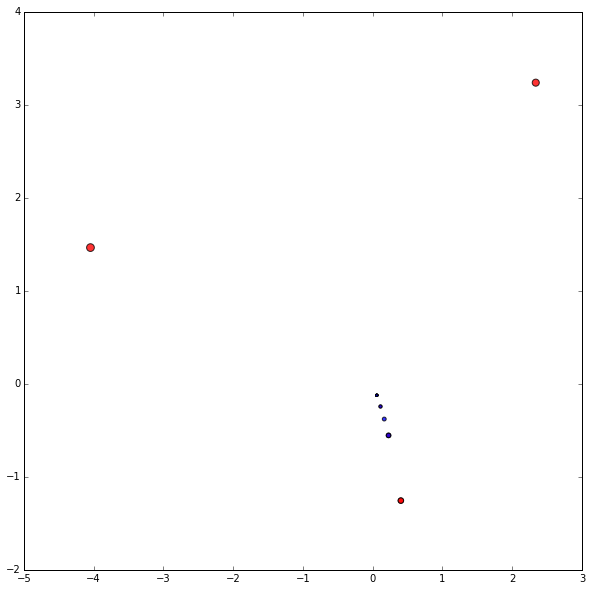

In [157]:
plt.figure(figsize=(10, 10), dpi=600)

plt.scatter(_coords[:, 0], _coords[:, 1], marker = 'o', c=colors, s=sizes, alpha=0.8)
# t = []
# for i, term in enumerate(vocabulary):
#     t.append(plt.text(_coords[i, 0], _coords[i, 1], term))
# adjust_text(t, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), force_points=0.5, expand_points=(0.9, 0.9))
plt.show()

In [158]:
mds = manifold.MDS(n_components=2)
results = mds.fit(term_frequency.T)
_coords = results.embedding_

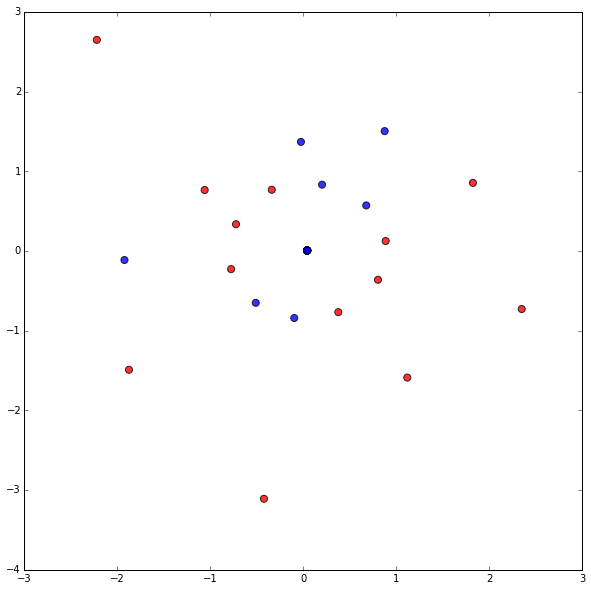

In [160]:
plt.figure(figsize=(10, 10), dpi=600)

plt.scatter(_coords[:, 0], _coords[:, 1], marker = 'o', c=colors, s=50, alpha=0.8)
# t = []
# for i, term in enumerate(vocabulary):
#     t.append(plt.text(_coords[i, 0], _coords[i, 1], term))
# adjust_text(t, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), force_points=0.5, expand_points=(0.9, 0.9))
plt.show()

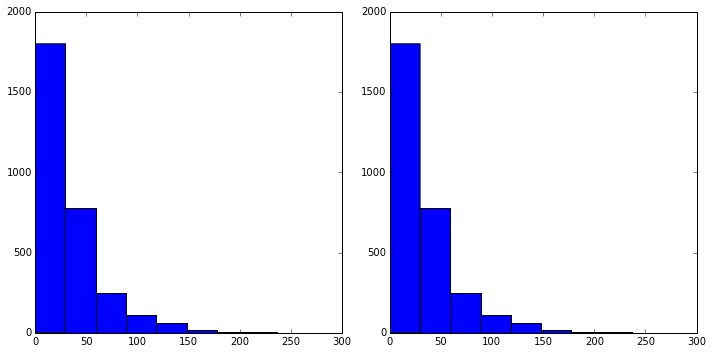

In [161]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(technocratic_data_matrix.sum(axis=1))

plt.subplot(122)
plt.hist(technocratic_data_matrix.sum(axis=1))
plt.tight_layout()
plt.show()

In [175]:
_D_freq = ((deliberative_data_matrix.sum(axis=1).astype(np.float).T/np.array(document_size))).T
_T_freq = ((technocratic_data_matrix.sum(axis=1).astype(np.float).T/np.array(document_size))).T
_D = _D_freq - _T_freq
_D /= _D.max()

In [163]:
_D.shape, deliberative_data_matrix.shape

((3026, 1), (3026, 22))

In [164]:
_T = _T_freq - _D_freq
_T /= _T.max()

In [165]:
_D_freq = np.array(_D_freq).reshape(_D_freq.shape[0])
_T_freq = np.array(_T_freq).reshape(_T_freq.shape[0])

(-0.5, 5)

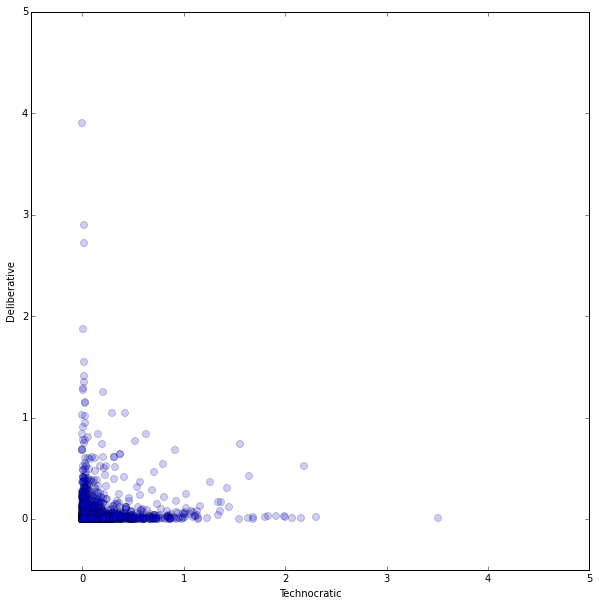

In [170]:
plt.figure(figsize=(10, 10))
plt.scatter(1e3*(_T_freq**2.), 1e3*(_D_freq**2.), alpha=0.2, s=50)
# plt.scatter(_T_freq, _D_freq, alpha=0.2, s=50)
plt.ylabel('Deliberative')
plt.xlabel('Technocratic')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(-0.5, 5)
plt.ylim(-0.5, 5)

In [121]:
technocratic_freq = np.ma.MaskedArray(technocratic_freq, not np.isnan)

NameError: name 'technocratic_freq' is not defined

In [53]:
technocratic_freq

masked_array(data =
 [[0.055865921787709494 0.0 0.0335195530726257 ..., 0.0 0.0
  0.16201117318435754]
 [0.0 0.0 0.010526315789473684 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.05263157894736842 0.0 0.0]
 ..., 
 [0.12871287128712872 0.0 0.18811881188118812 ..., 0.0891089108910891
  0.009900990099009901 0.0]
 [0.0 0.0 0.0 ..., 0.1 0.0 0.03333333333333333]
 [0.023255813953488372 0.0 0.09302325581395349 ..., 0.023255813953488372
  0.0 0.0]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]],
       fill_value = 1e+20)

In [26]:
c = cmap=plt.get_cmap('YlOrRd')

In [140]:
_D.max()

1.0